In [1]:
#2.1

import pandas as pd
df = pd.read_csv(r"Roy_AirlineSentiment.csv")

In [2]:
df.head(100)

,uid,name,airline,text,tweet_created,tweet_city,tweet_state
0,681448153.0,jnardino,Virgin America,@VirginAmerica plus you've added commercials t...,2/24/2015 11:15,Worcester,MA
1,681448159.0,jnardino,Virgin America,@VirginAmerica and it's a really big bad thing...,2/24/2015 11:14,Worcester,MA
2,681448176.0,HyperCamiLax,Virgin America,@VirginAmerica I &lt;3 pretty graphics. so muc...,2/24/2015 10:30,New York,NY
3,681448178.0,HyperCamiLax,Virgin America,@VirginAmerica This is such a great deal! Alre...,2/24/2015 10:30,New York,NY
4,681448186.0,ItzBrianHunty,Virgin America,@VirginAmerica So excited for my first cross c...,2/24/2015 9:42,Washington,D.C.
...,...,...,...,...,...,...,...
95,681448832.0,GaySkiWeek,Virgin America,@VirginAmerica Sent a couple messages to the e...,2/19/2015 13:45,Tempe,AZ
96,681448837.0,jamonholmgren,Virgin America,@VirginAmerica It's fine. Already done with my...,2/19/2015 13:18,Tucson,AZ
97,681448839.0,c_crubin,Virgin America,@VirginAmerica\nwjere is our luggage #so slow ...,2/19/2015 11:44,Worcester,MA
98,681448841.0,richeyvicious,Virgin America,@VirginAmerica I spoke with a representative t...,2/19/2015 10:18,Las Vegas,NV


In [3]:
# drop rows with NaN values
df = df.dropna()

# drop columns with NaN values
df = df.dropna(axis=1)

In [4]:
print("Shape of the dataframe is", df.shape)
print("The number of nulls in each column are\n", df.isna().sum())

Shape of the dataframe is (10000, 7)
The number of nulls in each column are
 uid              0
name             0
airline          0
text             0
tweet_created    0
tweet_city       0
tweet_state      0
dtype: int64


In [5]:
#2.2

df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")
df['text'] = [s.strip() for s in df['text']]
df['text'].head()

<ipython-input-5-85cb9d0667e1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")


0    VirginAmerica plus you ve added commercials to...
1    VirginAmerica and it s a really big bad thing ...
2    VirginAmerica I  lt   pretty graphics  so much...
3    VirginAmerica This is such a great deal  Alrea...
4    VirginAmerica So excited for my first cross co...
Name: text, dtype: object

In [6]:
#2.3

import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
vs_com = []
vs_pos = []
vs_neu = []
vs_neg = []
for sentence in df["text"]:
    vs_com.append(sid.polarity_scores(sentence)["compound"])
    vs_pos.append(sid.polarity_scores(sentence)["pos"])
    vs_neu.append(sid.polarity_scores(sentence)["neu"])
    vs_neg.append(sid.polarity_scores(sentence)["neg"])

In [8]:
#2.4

df['compound'] = vs_com
df['positive'] = vs_pos
df['neutral'] = vs_neu
df['negative'] = vs_neg

In [9]:
#2.5

df["sentiment"] = pd.cut(df["compound"], bins=3, labels=["negative", "neutral", "positive"])
df.head()

,uid,name,airline,text,tweet_created,tweet_city,tweet_state,compound,positive,neutral,negative,sentiment
0,681448153.0,jnardino,Virgin America,VirginAmerica plus you ve added commercials to...,2/24/2015 11:15,Worcester,MA,0.0000,0.000,1.000,0.000,neutral
1,681448159.0,jnardino,Virgin America,VirginAmerica and it s a really big bad thing ...,2/24/2015 11:14,Worcester,MA,-0.5829,0.000,0.679,0.321,negative
2,681448176.0,HyperCamiLax,Virgin America,VirginAmerica I lt pretty graphics so much...,2/24/2015 10:30,New York,NY,0.7490,0.444,0.556,0.000,positive
3,681448178.0,HyperCamiLax,Virgin America,VirginAmerica This is such a great deal Alrea...,2/24/2015 10:30,New York,NY,0.6249,0.157,0.843,0.000,positive
4,681448186.0,ItzBrianHunty,Virgin America,VirginAmerica So excited for my first cross co...,2/24/2015 9:42,Washington,D.C.,-0.5566,0.070,0.761,0.169,negative


In [10]:
#2.8

print("Total number of tweets in each sentiment category \n ",
      df.groupby('sentiment')['text'].count().sort_values(ascending=False))

Total number of tweets in each sentiment category 
  sentiment
positive    4667
neutral     3771
negative    1562
Name: text, dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

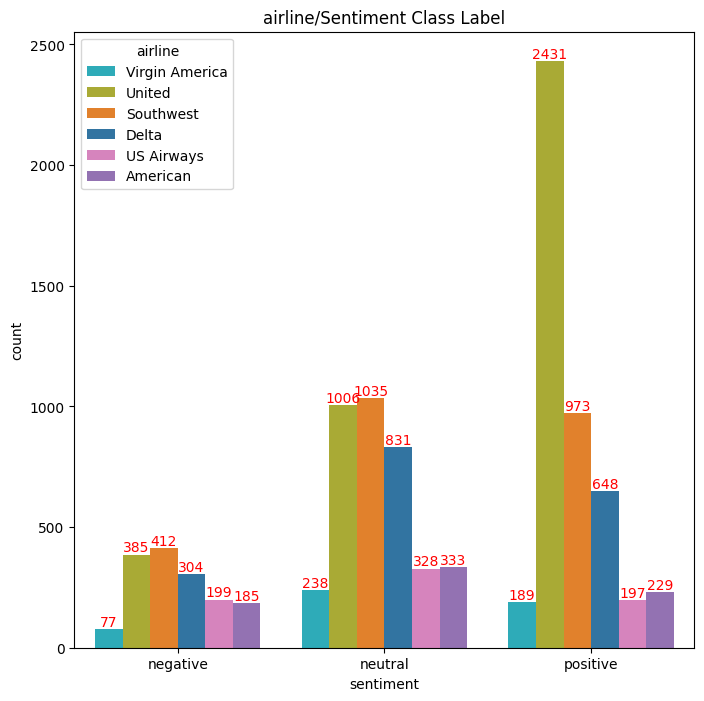

In [12]:
#2.9

palette = ['tab:cyan', 'tab:olive', 'tab:orange', 'tab:blue', 'tab:pink', 'tab:purple']
plt.figure(figsize=(8, 8))
sns.countplot(x='sentiment', hue='airline', palette=palette, data=df)
plt.title('airline/Sentiment Class Label')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha="center", va="bottom")
plt.show()

In [13]:
#2.10

df.to_csv("Roy_AirlineSentimentIntegrated.csv", index=False)

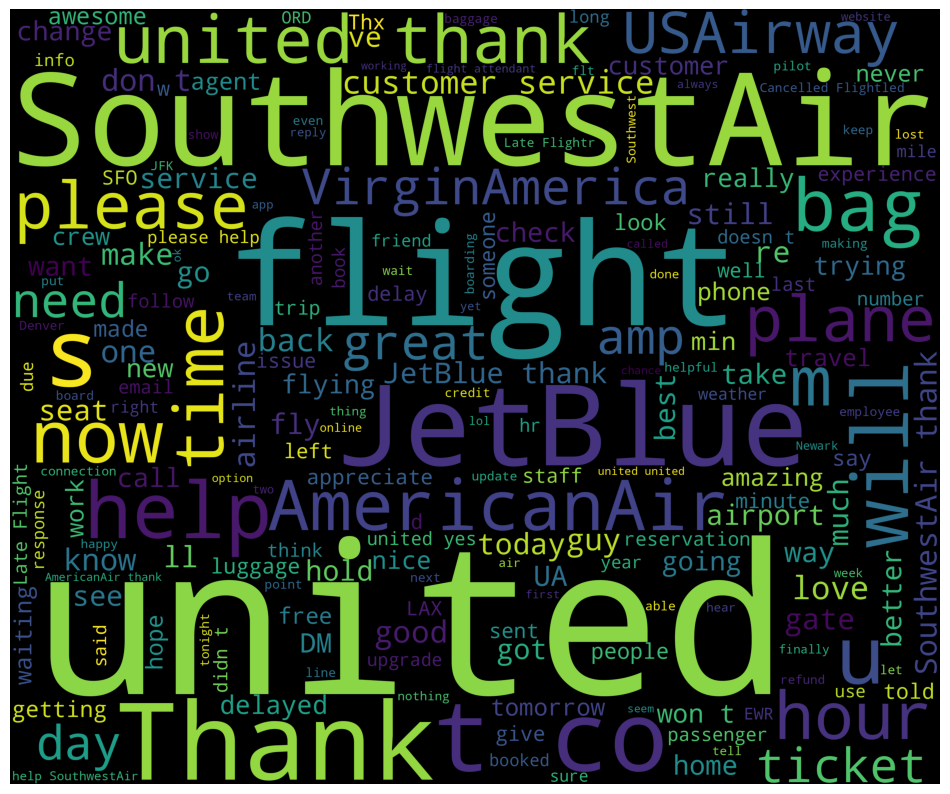

In [14]:
#3.2(1)

from wordcloud import WordCloud, STOPWORDS
new_df = df[df['sentiment']=='positive']
words = ' '.join(new_df['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

# generate a WordCloud object from 'cleaned_word' with the default STOPWORDS as stopwords and background_color='black'
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
new_stopwords = ["help", "Thanks", "will", "don  t", "ll", "got", "told", "issue", "back", "day", "Thank", "go", "never", "know",
                 "EWR", "late Flight", "M", "won t", "give", "trying", "see", "Cancelled Flightled", "number", "today",
                 "please", "first", "DM", "take", "agent", "info", "making", "actually", "u", "doesn t", "SFO", "due",
                 "getting", "chance", "much", "still", "W", "min", "reply", "yes", "ve", "want", "co", "think",]

new_stopwords_list = STOPWORDS.union(new_stopwords)
print(new_stopwords_list)

{'herself', 'still', 'like', 'ever', "hadn't", 'have', 'hers', "they've", 'whom', 'of', "when's", 'did', 'for', "here's", 'SFO', 'above', 'we', 'doing', "we'll", 'or', "you're", "hasn't", 'hence', 'never', 'once', 'much', 'me', 'more', 'll', 'yours', 'be', 'such', 'his', 'himself', 'a', 'is', 'any', 'same', 'these', 'they', 'got', 'yes', 'doesn t', 'otherwise', 'because', 'agent', 'then', 'all', 'told', 'when', 'she', 'k', 'DM', 'until', "won't", "she'd", "we'd", "you've", 'does', 'ourselves', "he'll", "i'll", 'co', 'however', 'com', 'who', "he's", 'get', 'today', 'how', 'EWR', 'being', 'at', 'since', 'to', 'the', 'up', 'know', 'if', 'our', 'also', 'again', 'here', 'itself', 'few', "they're", 'other', "you'll", 'as', 'about', 'chance', 'which', "aren't", 'further', "wouldn't", 'are', 'but', "we've", 'you', 'day', "didn't", 'it', 'shall', 'go', "let's", "why's", "what's", 'think', 'would', 'Thanks', 'after', 'down', 'he', 'i', 'their', 'therefore', "we're", 'will', 'trying', 'http', 'am

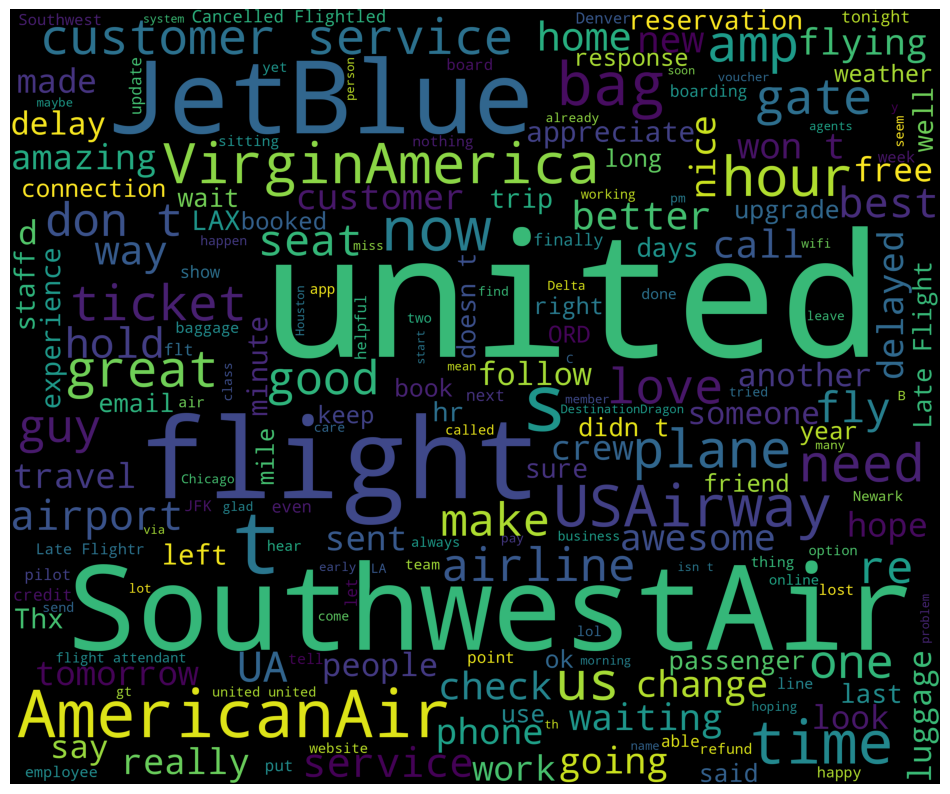

In [16]:
wordcloud = WordCloud(stopwords=new_stopwords_list,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
new_stopwords = ["re","delayed", "guy", "way", "left", "delay", "long", "someone", "don t", "lol", "hr", "seem", "gt", "say", "waiting",
                "even", "come", "ok", "sure", "made", "delayedwaiting", "Thx", "d", "seem"]

new_stopwords_list = new_stopwords_list.union(new_stopwords)
print(new_stopwords_list)

{'herself', 're', 'still', 'like', 'ever', "hadn't", 'have', 'hers', "they've", 'whom', 'of', "when's", 'did', 'for', "here's", 'SFO', 'above', 'we', 'doing', "we'll", 'or', "you're", "hasn't", 'hence', 'never', 'once', 'much', 'me', 'more', 'll', 'yours', 'be', 'such', 'someone', 'his', 'himself', 'a', 'is', 'any', 'same', 'these', 'they', 'got', 'yes', 'long', 'doesn t', 'otherwise', 'because', 'agent', 'then', 'hr', 'all', 'told', 'when', 'she', 'k', 'DM', 'until', "won't", "she'd", "we'd", 'seem', "you've", 'delayedwaiting', 'does', 'ourselves', "he'll", "i'll", 'co', 'gt', 'however', 'com', 'who', 'don t', "he's", 'get', 'today', 'how', 'EWR', 'being', 'at', 'since', 'to', 'the', 'waiting', 'up', 'know', 'if', 'our', 'also', 'again', 'here', 'itself', 'few', "they're", 'other', "you'll", 'as', 'lol', 'about', 'chance', 'which', "aren't", 'further', 'come', "wouldn't", 'are', 'but', "we've", 'you', 'day', 'delay', "didn't", 'it', 'shall', 'go', "let's", "why's", "what's", 'think', 

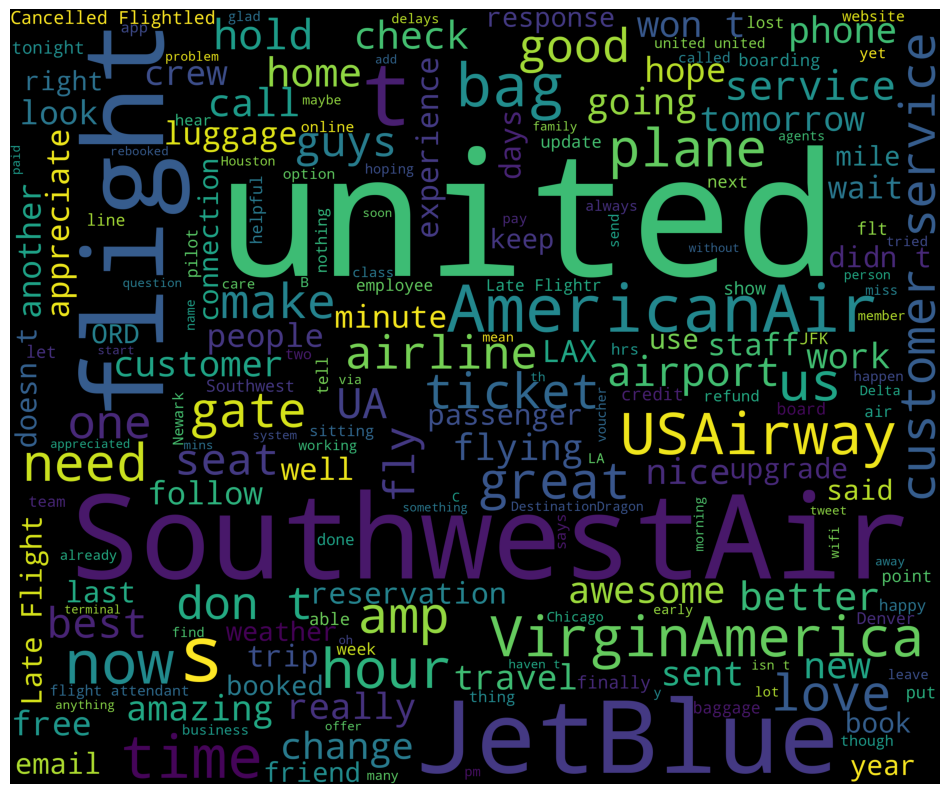

In [18]:
wordcloud = WordCloud(stopwords=new_stopwords_list,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

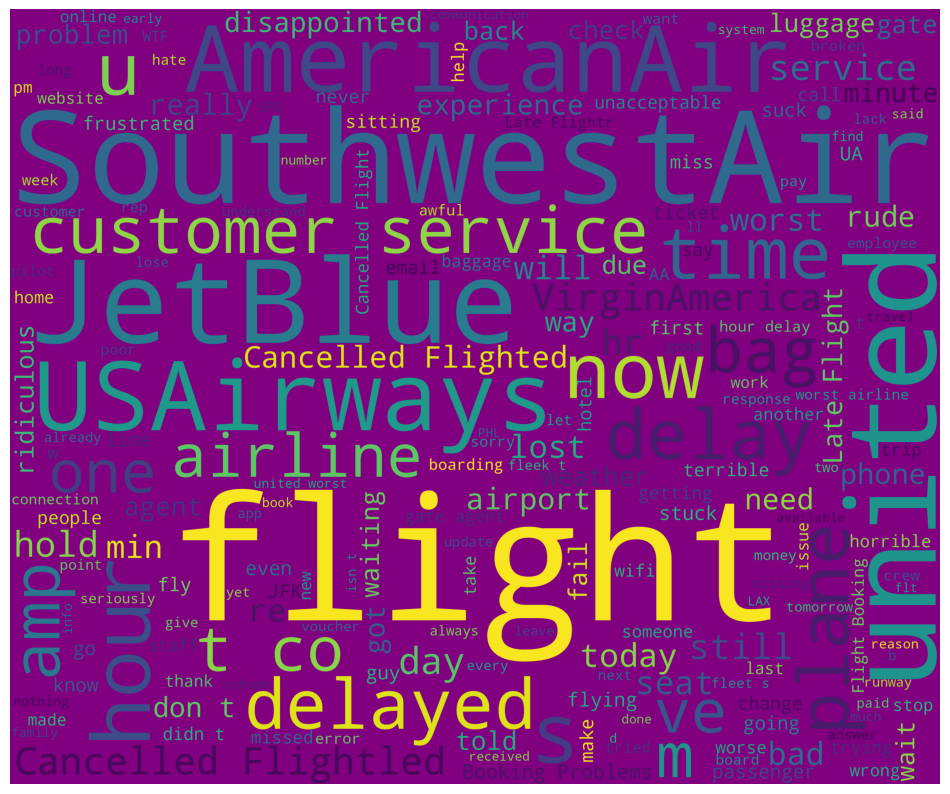

In [19]:
#3.2(2)

from wordcloud import WordCloud, STOPWORDS
new_df = df[df['sentiment']=='negative']
words = ' '.join(new_df['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='purple',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
new_stopwords = ["co", "one", "need", "line", "w", "t", "will", "getting", "early", "guy", "u", "going", "really", "two",
                "ve", "re", "thank", "AA"]

new_stopwords_list = STOPWORDS.union(new_stopwords)
print(new_stopwords_list)

{'herself', 're', 'like', 'ever', "hadn't", 'have', 'hers', "they've", 'whom', 'of', "when's", 'did', 'for', "here's", 'above', 'we', 'doing', "we'll", 'or', "you're", "hasn't", 'hence', 'once', 'me', 'more', 'yours', 'be', 'such', 'his', 'himself', 'a', 'is', 'any', 'same', 'these', 'they', 'really', 'otherwise', 'because', 'then', 'all', 'when', 'she', 'k', 'until', "won't", "she'd", "we'd", "you've", 'does', 'ourselves', "he'll", "i'll", 'co', 'however', 'com', 'who', "he's", 'get', 'how', 'being', 'at', 'since', 'to', 'the', 'up', 'if', 'our', 'also', 'again', 'here', 'itself', 'few', "they're", 'early', 'other', 'AA', "you'll", 'as', 'about', 'which', "aren't", 'further', "wouldn't", 'are', 'but', "we've", 'you', "didn't", 'it', 'shall', "let's", "why's", "what's", 'would', 'after', 'down', 'he', 'i', 'their', 'therefore', "we're", 'will', 'http', 'am', 'an', "i'd", "where's", 'having', 'going', "shouldn't", 't', 'off', 'cannot', "i'm", "don't", 'under', 'your', 'both', 'too', 'tw

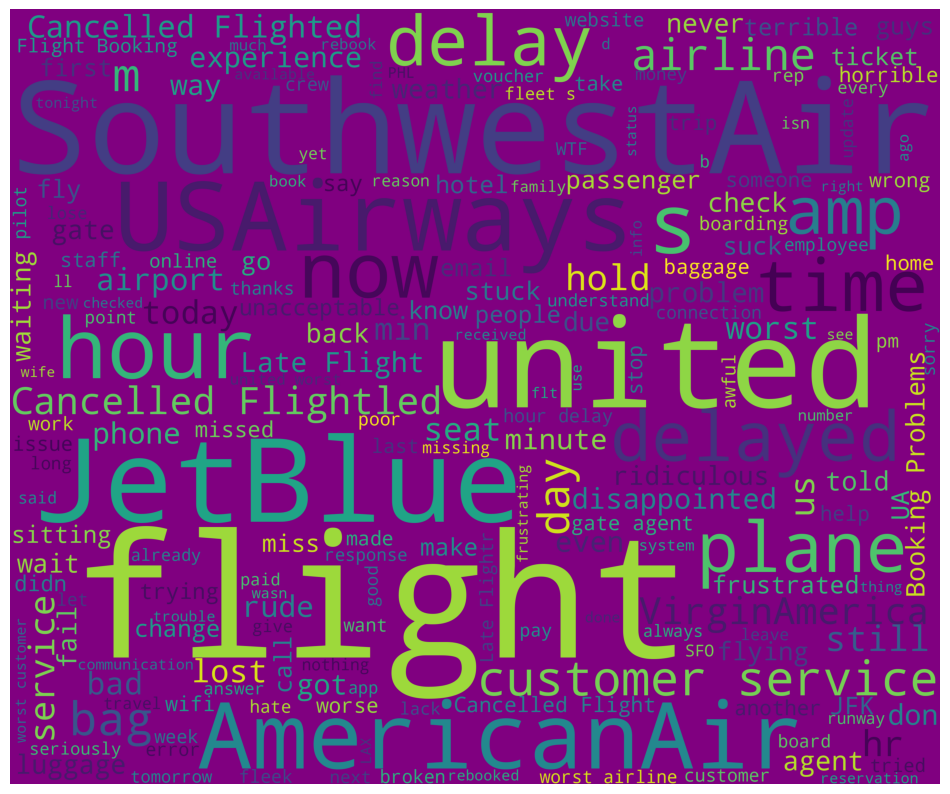

In [21]:
wordcloud = WordCloud(stopwords=new_stopwords_list,
                      background_color='purple',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
new_stopwords = ["don", "didn", "d", "guys", "way", "first", "PHL", "ll", "rep", "give", "make", "thing", "amp", "go",
                "min", "fleek", "someone", "much", "isn", "good"]

new_stopwords_list = new_stopwords_list.union(new_stopwords)
print(new_stopwords_list)

{'herself', 're', 'like', 'ever', "hadn't", 'have', 'hers', "they've", 'whom', 'of', "when's", 'did', 'for', "here's", 'above', 'we', 'doing', "we'll", 'or', "you're", "hasn't", 'hence', 'much', 'once', 'me', 'more', 'll', 'yours', 'be', 'such', 'someone', 'his', 'good', 'himself', 'a', 'is', 'any', 'same', 'these', 'they', 'really', 'otherwise', 'because', 'then', 'all', 'when', 'she', 'k', 'until', "won't", "she'd", "we'd", "you've", 'does', 'ourselves', "he'll", "i'll", 'co', 'rep', 'however', 'com', 'who', "he's", 'get', 'how', 'being', 'at', 'since', 'to', 'the', 'up', 'if', 'our', 'also', 'again', 'here', 'itself', 'few', "they're", 'early', 'other', 'AA', "you'll", 'as', 'about', 'fleek', 'which', "aren't", 'further', "wouldn't", 'are', 'but', "we've", 'you', "didn't", 'it', 'shall', 'go', "let's", "why's", "what's", 'guys', 'would', 'after', 'down', 'he', 'i', 'their', 'therefore', "we're", 'will', 'http', 'am', 'an', 'thing', 'isn', "i'd", 'amp', "where's", 'having', 'going', 

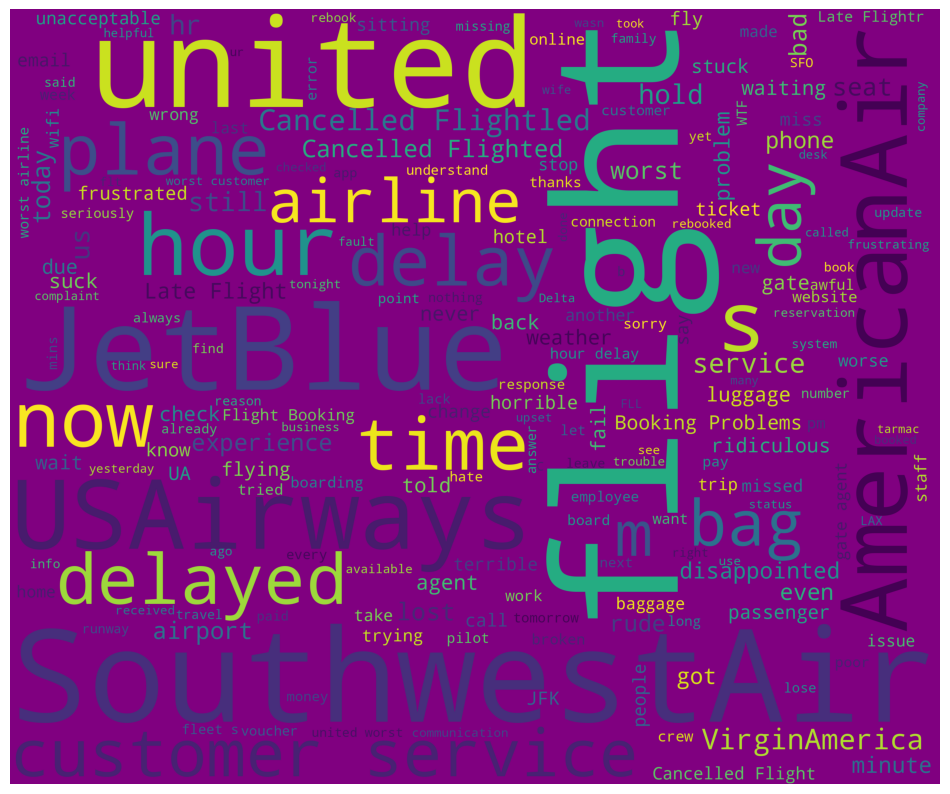

In [23]:
wordcloud = WordCloud(stopwords=new_stopwords_list,
                      background_color='purple',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
#3.1

import re

def text_to_words(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    words = text.lower().split()
    meaningful_words = [w for w in words if w not in new_stopwords_list]
    return " ".join(meaningful_words)

In [25]:
df['words']=df['text'].apply(lambda x: text_to_words(x))

In [26]:
print(new_stopwords_list)

{'herself', 're', 'like', 'ever', "hadn't", 'have', 'hers', "they've", 'whom', 'of', "when's", 'did', 'for', "here's", 'above', 'we', 'doing', "we'll", 'or', "you're", "hasn't", 'hence', 'much', 'once', 'me', 'more', 'll', 'yours', 'be', 'such', 'someone', 'his', 'good', 'himself', 'a', 'is', 'any', 'same', 'these', 'they', 'really', 'otherwise', 'because', 'then', 'all', 'when', 'she', 'k', 'until', "won't", "she'd", "we'd", "you've", 'does', 'ourselves', "he'll", "i'll", 'co', 'rep', 'however', 'com', 'who', "he's", 'get', 'how', 'being', 'at', 'since', 'to', 'the', 'up', 'if', 'our', 'also', 'again', 'here', 'itself', 'few', "they're", 'early', 'other', 'AA', "you'll", 'as', 'about', 'fleek', 'which', "aren't", 'further', "wouldn't", 'are', 'but', "we've", 'you', "didn't", 'it', 'shall', 'go', "let's", "why's", "what's", 'guys', 'would', 'after', 'down', 'he', 'i', 'their', 'therefore', "we're", 'will', 'http', 'am', 'an', 'thing', 'isn', "i'd", 'amp', "where's", 'having', 'going', 

In [27]:
#3.2

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train,test = train_test_split(df, test_size=0.3, random_state=10)

In [28]:
#3.3

train_clean_words=[]
for word in train['words']:
    train_clean_words.append(word)
test_clean_words=[]
for word in test['words']:
    test_clean_words.append(word)

In [29]:
#3.4

from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(analyzer = "word", max_features=1000)
train_features = v.fit_transform(train_clean_words)
test_features = v.transform(test_clean_words)
ar_train_features = train_features.toarray()
ar_test_features = test_features.toarray()

In [30]:
#3.5

dt = DecisionTreeClassifier()
dt_model = dt.fit(ar_train_features, train['sentiment'])
dt_pred = dt_model.predict(ar_test_features)

In [31]:
#3.6

print("Accuracy:", accuracy_score(test['sentiment'], dt_pred))

Accuracy: 0.6493333333333333


In [32]:
pip install scikit-plot

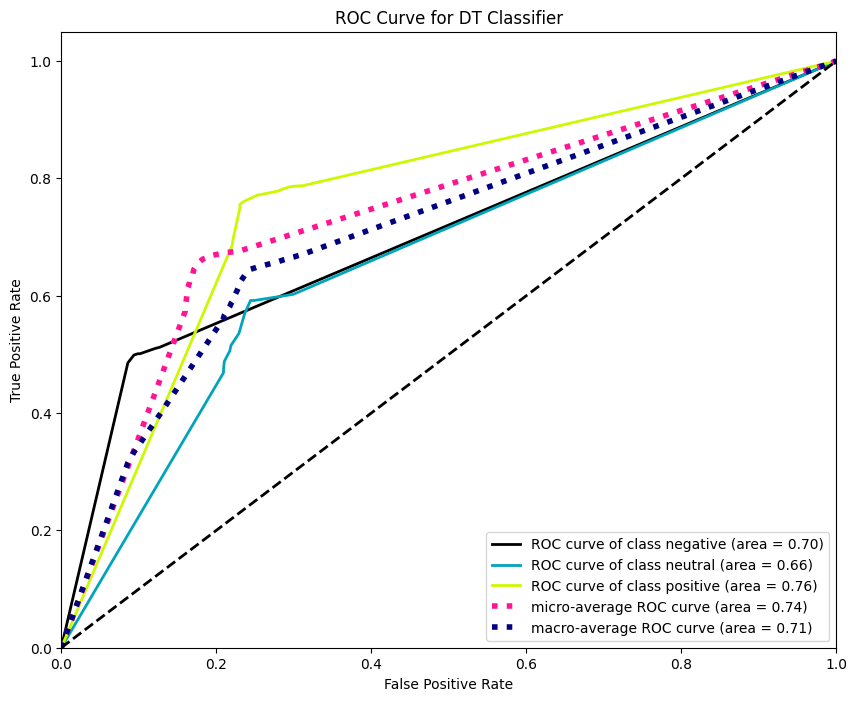

In [33]:
#3.7

import scikitplot as skplt

dt_predicted_probas = dt_model.predict_proba(ar_test_features)
skplt.metrics.plot_roc(test['sentiment'], dt_predicted_probas, figsize=(10, 8), title="ROC Curve for DT Classifier")
plt.show()

In [34]:
#4.1

from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(analyzer = "word", max_features=1000)
train_features = v.fit_transform(train_clean_words)
test_features = v.transform(test_clean_words)
ar_train_features = train_features.toarray()
ar_test_features = test_features.toarray()

In [35]:
#4.2

dt = DecisionTreeClassifier()
dt_model = dt.fit(ar_train_features, train['sentiment'])
dt_pred = dt_model.predict(ar_test_features)

In [36]:
#4.3

print("Accuracy:", accuracy_score(test['sentiment'], dt_pred))

Accuracy: 0.6363333333333333


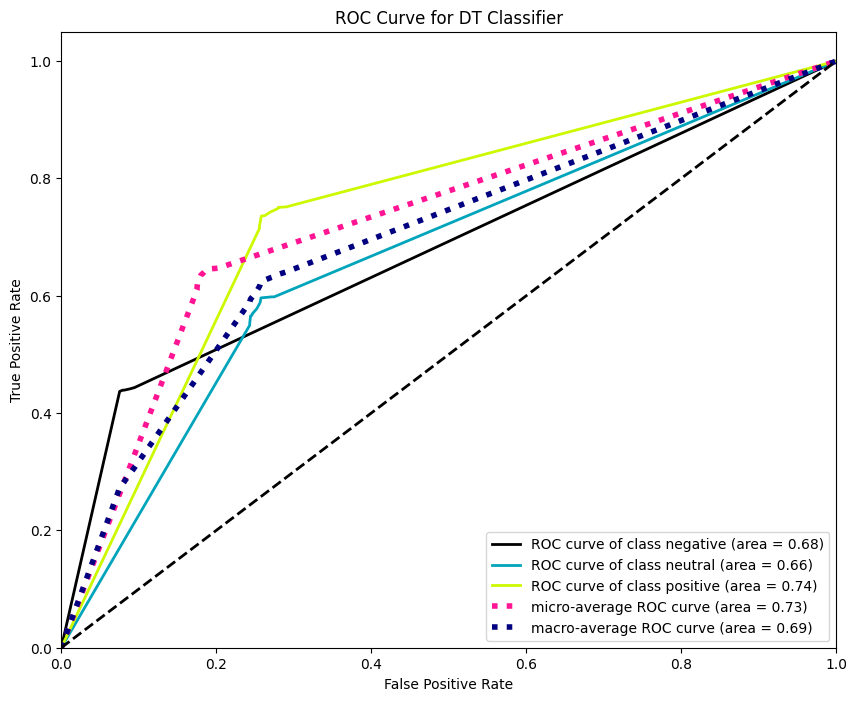

In [37]:
#4.5

dt_predicted_probas = dt_model.predict_proba(ar_test_features)
skplt.metrics.plot_roc(test['sentiment'], dt_predicted_probas, figsize=(10, 8), title="ROC Curve for DT Classifier")
plt.show()

In [38]:
#5.1

rf = RandomForestClassifier(n_estimators=200)

rf_model = rf.fit(ar_train_features, train['sentiment'])
rf_pred = rf_model.predict(ar_test_features)
print("Accuracy:", accuracy_score(test['sentiment'], rf_pred))

Accuracy: 0.6876666666666666


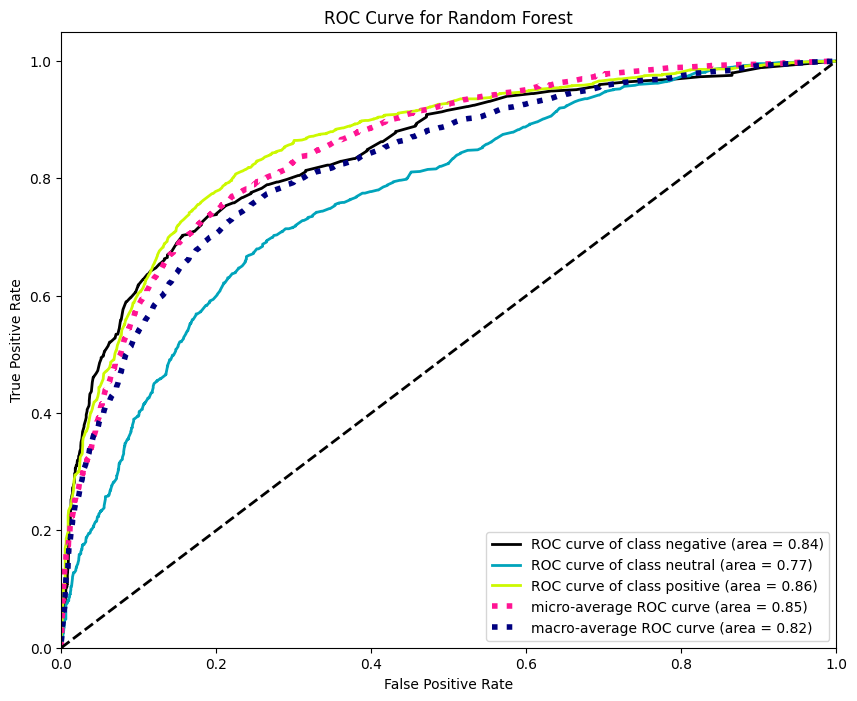

In [39]:
#5.2

rf_predicted_probas = rf_model.predict_proba(ar_test_features)

skplt.metrics.plot_roc(test['sentiment'], rf_predicted_probas, figsize=(10, 8), title="ROC Curve for Random Forest")
plt.show()

In [40]:
#5.3

rf = RandomForestClassifier(n_estimators=200)

rf_model = rf.fit(ar_train_features, train['sentiment'])
rf_pred = rf_model.predict(ar_test_features)
print("Accuracy:", accuracy_score(test['sentiment'], rf_pred))

Accuracy: 0.6903333333333334


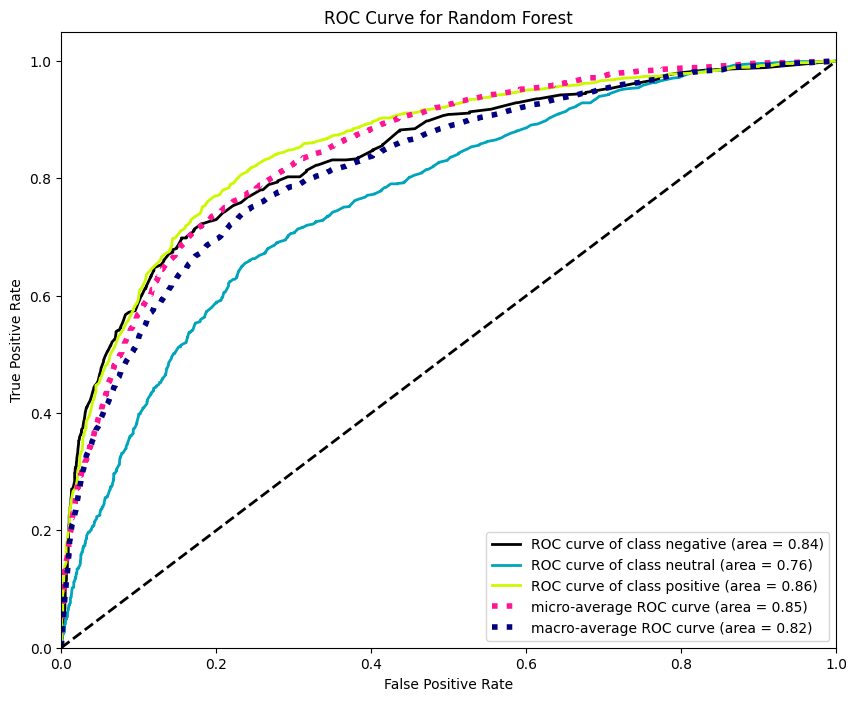

In [41]:
#5.4

rf_predicted_probas = rf_model.predict_proba(ar_test_features)

skplt.metrics.plot_roc(test['sentiment'], rf_predicted_probas, figsize=(10, 8), title="ROC Curve for Random Forest")
plt.show()